In [1]:
# Import the required libraries and dependencies
import pandas as pd
import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt



In [2]:
# Read the data from the csv into a Pandas DataFrame with the first column as row index
music_mental_health_df = pd.read_csv("Resources/mxmh_survey_results.csv")

#Drop timestamp column
music_mental_health_df = music_mental_health_df.drop(columns=["Timestamp"])

#dropping all null and NaN values
music_mental_health_df = music_mental_health_df.dropna()


# Review the DataFrame
music_mental_health_df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


In [3]:
#read data types
music_mental_health_df.dtypes

Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object
Frequency [Rock]                 object


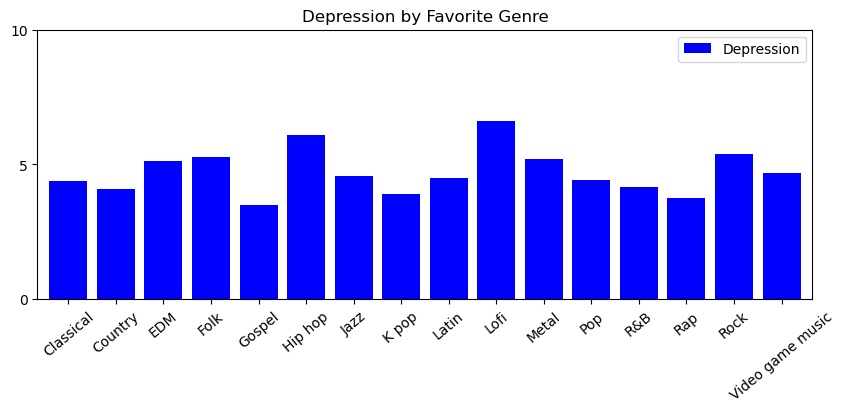

In [4]:
# Create a bar chart to chart the correlation between depression and Fav genre
genre_depression_df = music_mental_health_df[["Fav genre", "Depression"]]

fav_genre = genre_depression_df.groupby("Fav genre").mean()

fav_genre_chart = fav_genre.plot.bar(y='Depression', rot=40, width=0.8, figsize=(10,3.5), ylim=(0,10),
                                    title='Depression by Favorite Genre',
                                    yticks=[0,5,10], xlabel='', color='blue')

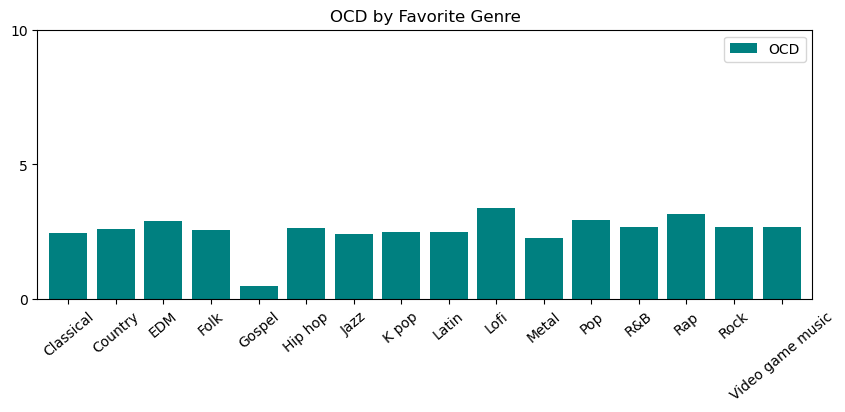

In [5]:
# Create a bar chart to chart the correlations between OCD and Fav genre
genre_ocd_df = music_mental_health_df[["Fav genre", "OCD"]]

fav_genre = genre_ocd_df.groupby("Fav genre").mean()

fav_genre_chart = fav_genre.plot.bar(y='OCD', rot=40, width=0.8, figsize=(10,3.5), ylim=(0,10),
                                    title='OCD by Favorite Genre',
                                    yticks=[0,5,10], xlabel='', color='teal')

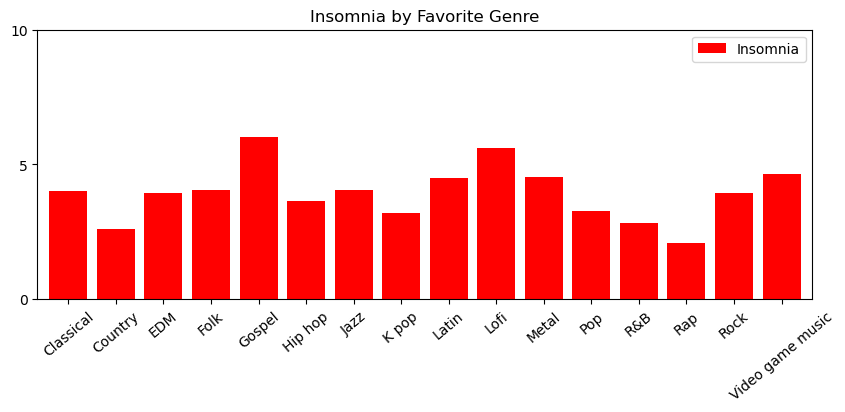

In [6]:
# Create a bar chart to chart the correlation between insomnia and Fav genre
genre_insomnia_df = music_mental_health_df[["Fav genre", "Insomnia"]]
fav_genre = genre_insomnia_df.groupby("Fav genre").mean()
fav_genre_chart = fav_genre.plot.bar(y='Insomnia', rot=40, width=0.8, figsize=(10,3.5), ylim=(0,10),
                                    title='Insomnia by Favorite Genre',
                                    yticks=[0,5,10], xlabel='', color='red')

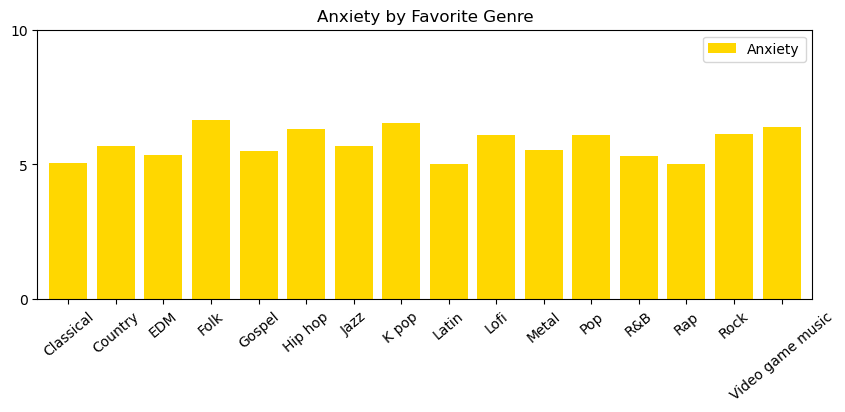

In [7]:
# Create a bar chart to chart the correlation between Anxiety and Fav genre
genre_anxiety_df = music_mental_health_df[["Fav genre", "Anxiety"]]
fav_genre = genre_anxiety_df.groupby("Fav genre").mean()
fav_genre_chart = fav_genre.plot.bar(y='Anxiety', rot=40, width=0.8, figsize=(10,3.5), ylim=(0,10),
                                    title='Anxiety by Favorite Genre',
                                    yticks=[0,5,10], xlabel='', color='gold')

In [8]:
df= music_mental_health_df[["Fav genre", "Depression","BPM", "OCD", "Anxiety", "Insomnia"]]
df_lofi = df[df["Fav genre"]=='Lofi']
df_lofi[["Depression","BPM","OCD", "Anxiety", "Insomnia"]].corr()

,Depression,BPM,OCD,Anxiety,Insomnia
Depression,1.000000,0.128445,-0.135977,0.317385,0.004526
BPM,0.128445,1.000000,0.838936,0.498297,0.530213
OCD,-0.135977,0.838936,1.000000,0.583753,0.273805
Anxiety,0.317385,0.498297,0.583753,1.000000,0.141651
Insomnia,0.004526,0.530213,0.273805,0.141651,1.000000
